## Description
This dataset contains the full historical data of the stock prices for MAANG companies since their Initial Public Offering (IPO). MAANG is an acronym that stands for Meta, Amazon, Apple, Netflix, and Google. The dataset contains daily, weekly, and monthly stock prices for each company and is automatically updated daily with the latest data obtained from Yahoo Finance.

## Features
**Date**: The specific date on which the stock price was recorded.<br>
**Open**: The opening price of the company's stock on that particular day.<br>
**High**: The highest trading price of the company's stock on that day.<br>
**Low**: The lowest trading price of the company's stock on that day.<br>
**Close**: The closing price of the company's stock on that day.<br>
**Adj Close**: The adjusted closing price of the company's stock on that day.<br>
**Volume**: The total number of shares traded on that day.<br>

## Use cases
This dataset can be utilized for a wide range of applications, including but not limited to:

**Market Analysis**: Conduct comprehensive market studies, analyze trends, and spot seasonal patterns.<br>
**Investment Strategies**: Develop and backtest investment strategies based on historical price movements.<br>
**Forecasting**: Build predictive models to forecast future stock prices and make informed decisions.<br>
**Trading Algorithms**: Design and test trading algorithms to capitalize on market opportunities.<br>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
amazon_daily_data = pd.read_csv("/content/AMAZON_daily.csv")
amazon_monthly_data = pd.read_csv("/content/AMAZON_monthly.csv")
amazon_weekly_data = pd.read_csv("/content/AMAZON_weekly.csv")

In [47]:
amazon_daily_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0.097917
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0.086458
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0.085417
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0.081771
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0.071354


In [48]:
amazon_daily_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7051,2025-05-27,203.089996,206.690002,202.190002,206.020004,34892000,206.020004
7052,2025-05-28,205.919998,207.660004,204.410004,204.720001,28549800,204.720001
7053,2025-05-29,208.029999,208.809998,204.229996,205.699997,34650000,205.699997
7054,2025-05-30,204.839996,205.990005,201.699997,205.009995,51679400,205.009995
7055,2025-06-02,204.979996,207.000000,202.679993,206.649994,29048100,206.649994


### Market Analysis: Conduct comprehensive market studies, analyze trends, and spot seasonal patterns.

In [49]:
# missing values
print(amazon_daily_data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


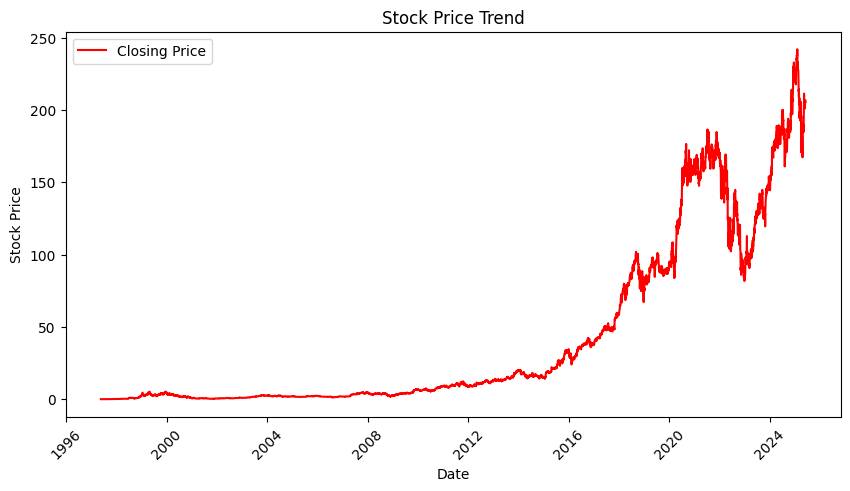

In [50]:
amazon_daily_data["Date"] = pd.to_datetime(amazon_daily_data["Date"])
# Plot Closing Prices over time
#Exploratory Data Analysis (EDA)
#identifying trends with time-series-plot
#moving average to smooth
#analyse seasonality
plt.figure(figsize=(10,5))
plt.plot(amazon_daily_data["Date"], amazon_daily_data["Close"], label="Closing Price",color = "red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Trend")
plt.legend()
plt.xticks(rotation=45)
plt.show()


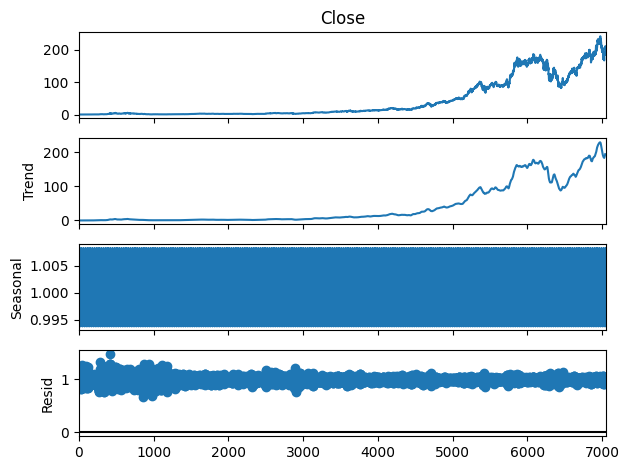

In [51]:
#Seasonal patterns Analysis
#using Seasonal decomposition
#Trend
#Seasonality
#Residuals
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(amazon_daily_data["Close"],model = "multiplicartive", period=30)

result.plot()
plt.show()


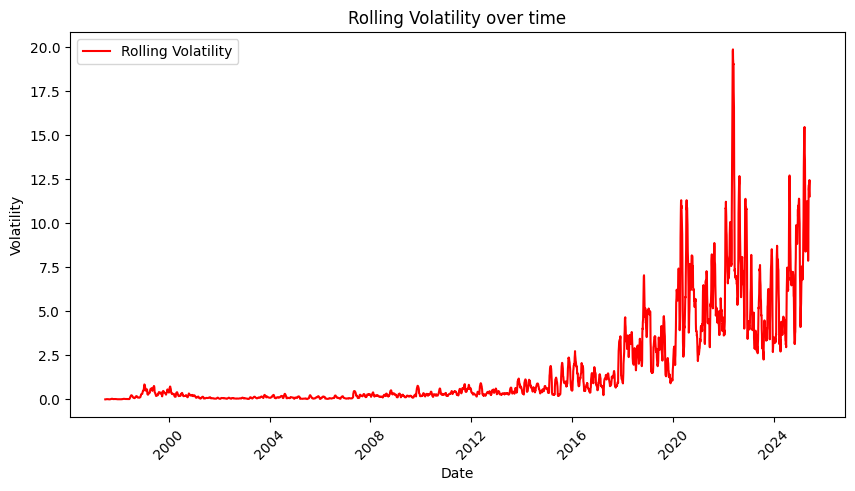

In [52]:
# calculate standard deviation and rolling volatility
amazon_daily_data["Volatility"] = amazon_daily_data["Close"].rolling(window=30).std()

plt.figure(figsize=(10,5))
plt.plot(amazon_daily_data["Date"], amazon_daily_data["Volatility"], label="Rolling Volatility",color = "red")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Rolling Volatility over time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [53]:
#predict future stock prices based on historical trends
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

amazon_daily_data["Date_Ordinal"] = amazon_daily_data["Date"].apply(lambda x: x.toordinal())

X = amazon_daily_data[["Date_Ordinal"]]
y = amazon_daily_data["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

future_dates = np.array([X_test.iloc[-1,0] + i for i in range(1,30)]).reshape(-1,1)
future_predictions = model.predict(future_dates)
print("Future Predictions:")
print(future_predictions)

Future Predictions:
[94.57366636 94.59037218 94.607078   94.62378383 94.64048965 94.65719547
 94.67390129 94.69060712 94.70731294 94.72401876 94.74072459 94.75743041
 94.77413623 94.79084206 94.80754788 94.8242537  94.84095953 94.85766535
 94.87437117 94.891077   94.90778282 94.92448864 94.94119447 94.95790029
 94.97460611 94.99131193 95.00801776 95.02472358 95.0414294 ]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
# ARIMA time-series forecasting
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(amazon_daily_data["Close"], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
print("Stock Price Forecast")
print(forecast)

Stock Price Forecast
7056    206.548172
7057    206.581344
7058    206.526229
7059    206.557286
7060    206.551868
7061    206.554020
7062    206.552256
7063    206.553007
7064    206.552807
7065    206.552897
7066    206.552845
7067    206.552866
7068    206.552859
7069    206.552862
7070    206.552860
7071    206.552861
7072    206.552861
7073    206.552861
7074    206.552861
7075    206.552861
7076    206.552861
7077    206.552861
7078    206.552861
7079    206.552861
7080    206.552861
7081    206.552861
7082    206.552861
7083    206.552861
7084    206.552861
7085    206.552861
Name: predicted_mean, dtype: float64


In [55]:
#LSTM deep learning for stock prediction
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

X = np.array(amazon_daily_data["Date_Ordinal"]).reshape(-1,1,1)
y = np.array(amazon_daily_data["Close"])

model = Sequential([
    LSTM(50, activation="relu",return_sequences=True, input_shape=(1,1)),
    LSTM(50, activation="relu"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

model.fit(X,y,epochs=50,verbose=1)
future_dates = np.array([X[-1][0][0] + i for i in range(1,30)]).reshape(-1,1,1)
future_predictions = model.predict(future_dates)
print("LSTM Future Predictions:")
print(future_predictions)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 21195.7148
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3632.4529
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4027.6091
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3796.6323
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3800.0371
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4096.6245
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3767.8884
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4088.3276
Epoch 9/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4332.1270
Epoch 10/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3827.8359
Epoch 11/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3829.5227
Epoch 12/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4064.7952
Epoch 13/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4075.8350
Epoch 14/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3930.1150
Epoch 15/50
221/221 ━━━━━